# **MODELADO PARA PRECIPITACIÓN EN PUEBLA CON TRANSFORMACION YEO-JHONSON**

Ubicación de la estación: 19.0000, -98.1833




Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/
https://www.ncei.noaa.gov/pub/data/ghcn/v4/products/StationPlots/MX/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/  
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/doc/


### *Configuración de la Notebook*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
# The color palette is made up of the 20 colors. Hex color codes:  #395e77, #413344,  #614c65,  #806485,  #936397,  #a662a8,  #664972,  #463c57,  #6e8da9,  #91bcdd,  #567d99,  #305662,  #264d4d,  #315c45,  #8a9a65,  #b6b975,  #b65d54,  #b60033,  #98062d and  #800022.
# https://colorkit.co/palette/413344-614c65-806485-936397-a662a8-664972-463c57-6e8da9-91bcdd-567d99-395e77-305662-264d4d-315c45-8a9a65-b6b975-b65d54-b60033-98062d-800022/
sns.set_palette(["#194a7a", "#b60033", "#315c45", "#b65d54", "#B9445F", "#567d99", "#395e77", "#413344", "#614c65", "#806485", "#936397", "#a662a8", "#664972", "#463c57", "#6e8da9", "#91bcdd", "#305662", "#264d4d",  "#8a9a65", "#b6b975", "#98062d", "#800022"])
sns.color_palette()

[(0.09803921568627451, 0.2901960784313726, 0.47843137254901963),
 (0.7137254901960784, 0.0, 0.2),
 (0.19215686274509805, 0.3607843137254902, 0.27058823529411763),
 (0.7137254901960784, 0.36470588235294116, 0.32941176470588235),
 (0.7254901960784313, 0.26666666666666666, 0.37254901960784315),
 (0.33725490196078434, 0.49019607843137253, 0.6),
 (0.2235294117647059, 0.3686274509803922, 0.4666666666666667),
 (0.2549019607843137, 0.2, 0.26666666666666666),
 (0.3803921568627451, 0.2980392156862745, 0.396078431372549),
 (0.5019607843137255, 0.39215686274509803, 0.5215686274509804),
 (0.5764705882352941, 0.38823529411764707, 0.592156862745098),
 (0.6509803921568628, 0.3843137254901961, 0.6588235294117647),
 (0.4, 0.28627450980392155, 0.4470588235294118),
 (0.27450980392156865, 0.23529411764705882, 0.3411764705882353),
 (0.43137254901960786, 0.5529411764705883, 0.6627450980392157),
 (0.5686274509803921, 0.7372549019607844, 0.8666666666666667),
 (0.18823529411764706, 0.33725490196078434, 0.3843137254901961),
 (0.14901960784313725, 0.30196078431372547, 0.30196078431372547),
 (0.5411764705882353, 0.6039215686274509, 0.396078431372549),
 (0.7137254901960784, 0.7254901960784313, 0.4588235294117647),
 (0.596078431372549, 0.023529411764705882, 0.17647058823529413),
 (0.5019607843137255, 0.0, 0.13333333333333333)]

In [5]:
# Personalización global con matplotlib
plt.rcParams.update({
    'axes.titlesize': 14,        # Tamaño del título
    'axes.titleweight': 'bold',  # Negrita en el título
    'xtick.labelsize': 8,        # Tamaño de los xticks
    'ytick.labelsize': 8,         # Tamaño de los yticks
    'grid.color': 'gray',         # Color de las líneas del grid
    'grid.linestyle': '--',       # Estilo de línea (puede ser '-', '--', '-.', ':')
    'grid.linewidth': 0.5,        # Grosor del grid
    'axes.grid': True,            # Asegura que el grid esté activado
    'axes.grid.axis': 'both',     # Aplica el grid a ambos ejes
    'lines.linewidth': 1.2,       # Grosor de las líneas
    'figure.figsize': (12, 6),   # Tamaño de la figura
})

### *Cargar Datos*

In [6]:
data=pd.read_csv('MXN00021035.csv')

In [7]:
pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

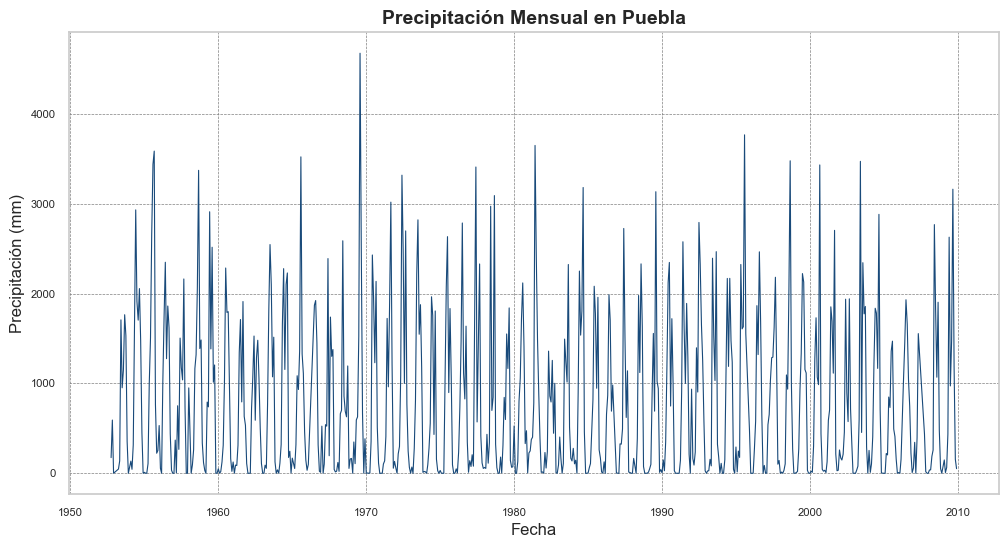

In [8]:
plt.figure()
plt.plot(pre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-precipitacion.svg', bbox_inches='tight')
plt.show()

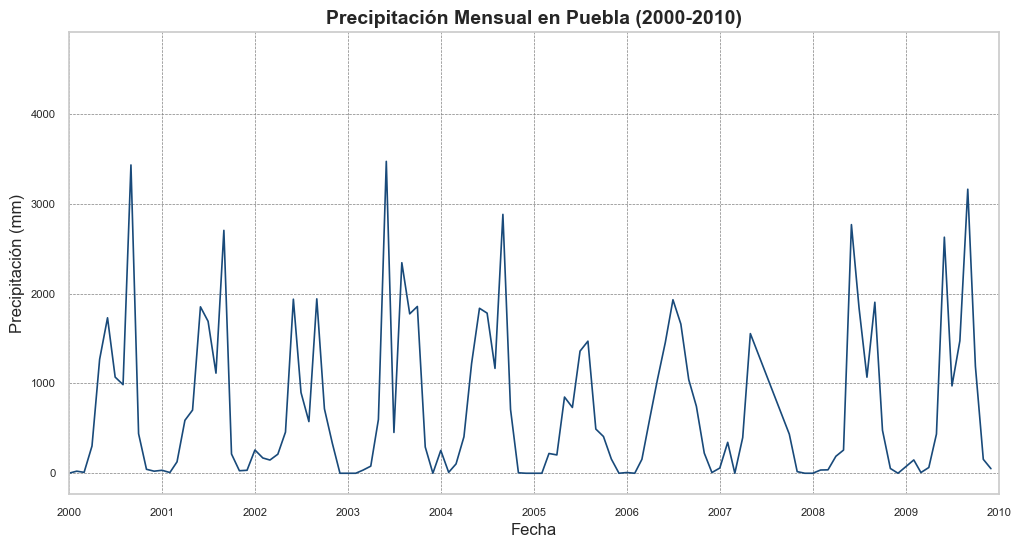

In [9]:
plt.figure()
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla (2000-2010)")
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-01-01')) 
plt.savefig('imagenes/01-2-precipitacion.svg', bbox_inches='tight')
plt.show()

# **TRAIN Y TEST**

In [10]:
# Partir la serie para train y test
pre_total = pre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
pre = pre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
pre_test = pre_total[-12:]      # Test: últimos 12 meses

# **ESTACIONARIEDAD**

In [11]:
from statsmodels.tsa.stattools import adfuller  

In [12]:
adfuller(pre)

(-6.150368236022431,
 7.588129761676333e-08,
 11,
 648,
 {'1%': -3.4404817800778034,
  '5%': -2.866010569916275,
  '10%': -2.569150763698369},
 9999.934707132943)

In [13]:
estacionariedad = adfuller(pre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 7.588129761676333e-08


## **AUTOCORRELACIONES**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

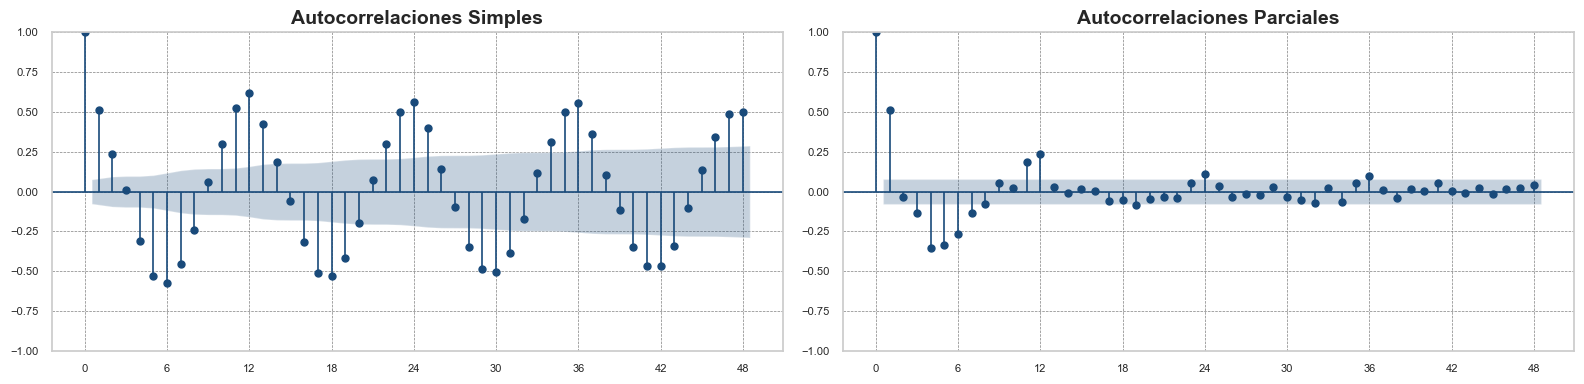

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(pre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(pre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [16]:
fac = FAC(len(pre), acf(pre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.5114347926277152
r2: 0.2378815083370086
r4: -0.31136216826642676
r5: -0.5289967604156933
r6: -0.5765988530134251
r7: -0.45402986204483337
r8: -0.24420551667402535
r10: 0.2960004737880804
r11: 0.5240658344251691
r12: 0.6173499572874945
r13: 0.42440124462107487
r14: 0.18265000690415575
r16: -0.31903920298321276
r17: -0.514286815393446
r18: -0.5278295916966887
r19: -0.4187324328138189
r22: 0.3006730414425205
r23: 0.5028304240974978
r24: 0.5626631891391943


In [17]:
facp = FACP(len(pre), pacf(pre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.5122108697030229
rho 3: -0.13710249814403871
rho 4: -0.35568794886746186
rho 5: -0.3390668723583034
rho 6: -0.26990992305506767
rho 7: -0.13651941979413404
rho 8: -0.08206891960261499
rho 11: 0.19446853660047778
rho 12: 0.2502109478102962
rho 19: -0.09242352101466453
rho 24: 0.12444505947195694


# **Aunque la serie es estacionaria, dado que las autocorrelaciones simples decrecen muy muy lento, hacemos una primera diferencia estacional**

# **DIFERENCIA ESTACIONAL**

La **diferencia estacional de orden $D$**, con una periodicidad estacional $s$, se define de forma recursiva aplicando el operador $\nabla_s$ múltiples veces:
*
$$
\nabla_s^D X_t = (1 - B^s)^D X_t
$$*

donde:
- $D$ es el orden de la diferencia estacional,
- $B$ es el operador de rezago tal que $B^k X_t = y_{X-k}$,
- $\nabla_s^D$ representa aplicar $D$ veces la diferencia estacional.

En forma explícita para el caso en que:
- El orden de la diferencia estacional es $D = 1$,
- La periodicidad estacional es $s = 12$ (por ejemplo, para datos mensuales con estacionalidad anual).

Entonces, la primera diferencia estacional es:

$$
\nabla_{12}^1 X_t = X_t - X_{t-12}
$$

Sea entonces $Wt = \nabla_{12}^1 X_t = X_t - X_{t-12}$

In [18]:
# Primera diferencia estacional con periodicidad 12
dpre = pre.diff(12).dropna() 

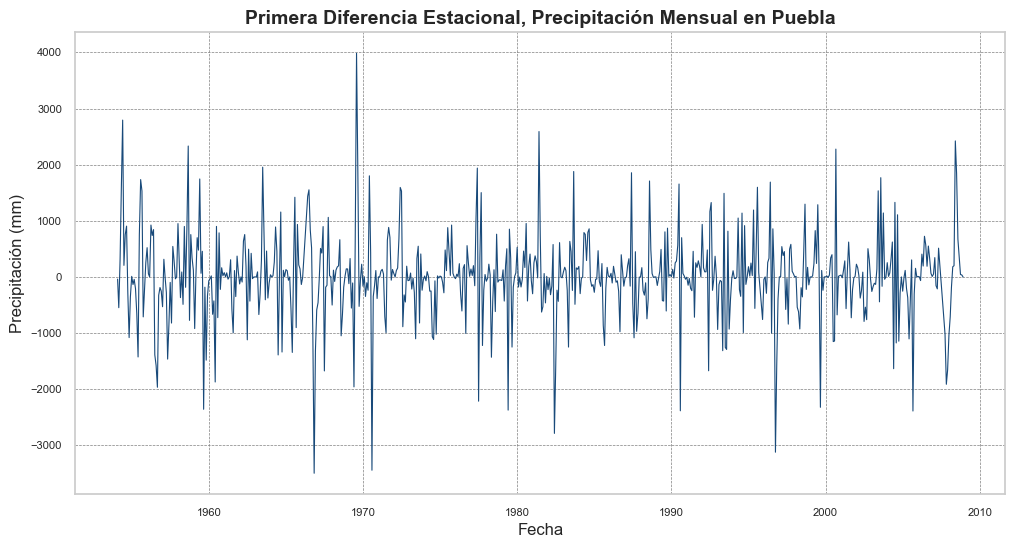

In [19]:
plt.figure()
plt.plot(dpre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Primera Diferencia Estacional, Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-precipitacion.svg', bbox_inches='tight')
plt.show()

In [20]:
# Partir la serie para train y test
dpre_total = dpre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
dpre = dpre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
dpre_test = dpre_total[-12:]      # Test: últimos 12 meses

In [21]:
adfuller(dpre)

(-10.193964890003045,
 6.216285925001571e-18,
 11,
 624,
 {'1%': -3.440873084361836,
  '5%': -2.866182929627575,
  '10%': -2.5692425987220577},
 9750.583034503328)

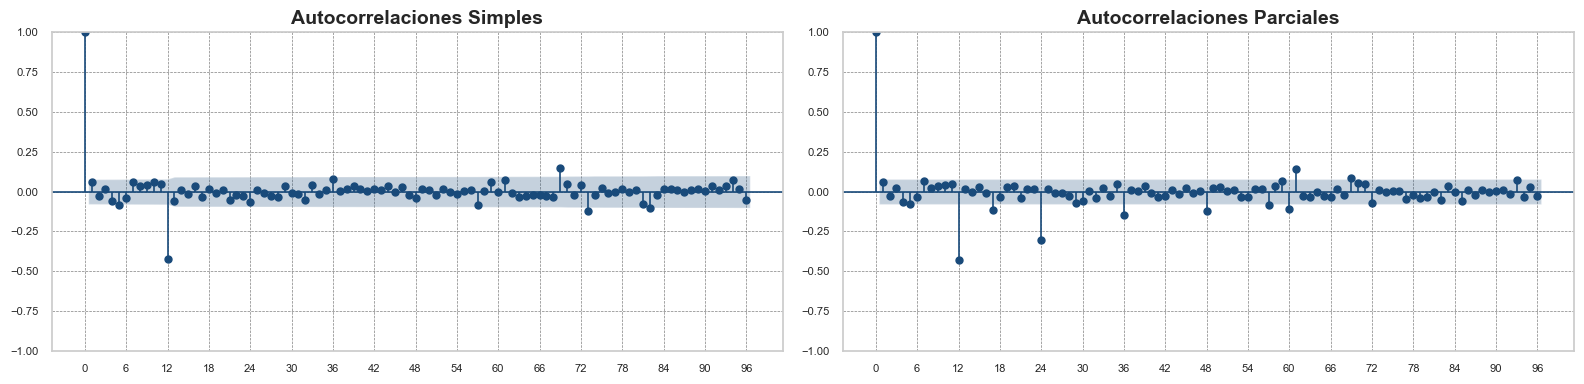

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(dpre, lags=12*8, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(dpre, lags=12*8, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [23]:
fac = FAC(len(dpre), acf(dpre, nlags=12*8)[1:] )

Valores de autocorrelacion significativos:
r5: -0.08546767495564356
r12: -0.42644747515149606
r69: 0.1464132579723921
r73: -0.1192799044131447
r82: -0.1022835870700309


In [24]:
facp = FACP(len(dpre), pacf(dpre, nlags=12*8)[1:])

Valores de autocorrelacion parcial significativos:
rho 12: -0.4391762988508309
rho 17: -0.12051330466276727
rho 24: -0.3172851462782251
rho 29: -0.08053105731674266
rho 36: -0.1622791587412823
rho 48: -0.14180512086639613
rho 57: -0.09540877151497436
rho 60: -0.13044329761240864
rho 61: 0.1631227249383391
rho 69: 0.09534972883755533
rho 72: -0.10151682356143837
rho 93: 0.09791674524163121


# **MODELADO**

Ver 02-Ordenar-Modelos y 03-Encontrar-un-Modelo-que-Cumpla

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
# import pmdarima as pm

In [27]:
# # Encontrar el mejor SARIMA, Basado en ul AIC 
# auto_sarima_model = pm.auto_arima(ypre, 
#                                   seasonal=True, 
#                                   m=12,
#                                   stepwise=True, 
#                                   suppress_warnings=True, 
#                                   trace=True)

(1) ARIMA(1,0,0)(0,0,1)[12], AIC=10217.831  
(2) ARIMA(0,0,1)(0,0,1)[12], AIC=10218.699  
(3) ARIMA(1,0,1)(0,0,1)[12], AIC=10219.566  
(4) ARIMA(2,0,0)(0,0,1)[12], AIC=10219.591  
(5) ARIMA(1,0,0)(0,0,2)[12], AIC=10219.801  
(6) ARIMA(1,0,0)(1,0,1)[12], AIC=10219.806  
(7) ARIMA(0,0,2)(0,0,1)[12], AIC=10220.097  
(8) ARIMA(0,0,1)(0,0,2)[12], AIC=10220.674  
(9) ARIMA(0,0,1)(1,0,1)[12], AIC=10220.678  
(10) ARIMA(0,0,0)(0,0,1)[12], AIC=10232.767  
(11) ARIMA(1,0,0)(1,0,0)[12], AIC=10310.582  
(12) ARIMA(0,0,1)(1,0,0)[12], AIC=10310.665  
(13) ARIMA(0,0,1)(0,0,0)[12], AIC=10440.284  
(14) ARIMA(1,0,0)(0,0,0)[12], AIC=10440.419  
(15) ARIMA(0,0,0)(0,0,0)[12], AIC=10443.104  

In [28]:
from modelo_admisible import * # Una funcion que hice para verificar si los parametros son estacionarios/invertibles

## **1° Modelo con mejor AIC**

In [29]:
modelo=SARIMAX(dpre,
               order=(1,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  636
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -4999.257
Date:                              Thu, 24 Apr 2025   AIC                          10004.514
Time:                                      18:01:20   BIC                          10017.880
Sample:                                           0   HQIC                         10009.703
                                              - 636                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1352      0.031      4.324      0.000       0.074       0.196
ma.S.L12      -0.6950      0.023    -29.880      0.000      -0.741      -0.649
sigma2      3.887e+05   1.47e+04     26.399      0.000     3.6e+05    4.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               219.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.50
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
modelo=SARIMAX(pre,
               order=(1,0,0),
               seasonal_order=(0,1,1,12)).fit()

modelo.summary()

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -5105.844
Date:                              Thu, 24 Apr 2025   AIC                          10217.689
Time:                                      18:01:20   BIC                          10231.111
Sample:                                           0   HQIC                         10222.896
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1692      0.031      5.453      0.000       0.108       0.230
ma.S.L12      -0.6868      0.024    -28.471      0.000      -0.734      -0.640
sigma2       4.04e+05   1.51e+04     26.829      0.000    3.74e+05    4.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               232.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.54
Prob(H) (two-sided):                  0.33   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


$$
\text{ARIMA}(1,0,0) \times (0,0,1)_{12} \text{ para $W_t$}
$$

$$
\text{ARIMA}(1,0,0) \times (0,1,1)_{12} \text{ para $X_t$}
$$

con los coeficientes:

- $\phi_1 = 0.1691785261672151$
- $\Theta_1 = 0.6868323986912898$

$$
(1
- \phi_1B)W_t=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

Donde $Wt = \nabla_{12}^1 X_t = X_t - X_{t-12}$ y $\varpsilon_t \sim \mathcal{N}(0, 1)$

In [31]:
parsimonia(modelo) 

El modelo cumple el principio de parsimonia

:)


In [32]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.1691785261672151}

Raíces del polinomio característico: [5.91091566]

Módulo de las raíces: [5.91091566]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [33]:
invertible(modelo)

El polinomio de la parte media movil es: {'p12': -0.6868323986912898}

Raíces del polinomio característico: [-1.03180058e+00+0.j         -8.93565516e-01+0.51590029j
 -8.93565516e-01-0.51590029j -5.15900291e-01+0.89356552j
 -5.15900291e-01-0.89356552j  2.49800181e-16+1.03180058j
  2.49800181e-16-1.03180058j  5.15900291e-01+0.89356552j
  5.15900291e-01-0.89356552j  1.03180058e+00+0.j
  8.93565516e-01+0.51590029j  8.93565516e-01-0.51590029j]

Módulo de las raíces: [1.03180058 1.03180058 1.03180058 1.03180058 1.03180058 1.03180058
 1.03180058 1.03180058 1.03180058 1.03180058 1.03180058 1.03180058]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


Ljung-Box (L1) (Q):	0.00  
Prob(Q):	0.95

Independientes

Jarque-Bera (JB):	9.68  
Prob(JB):	0.01

No son normales :(

Heteroskedasticity (H):	0.91  
Prob(H) (two-sided):	0.48

Varianza constante

In [34]:
residuos=modelo.resid

In [35]:
from scipy.stats import ttest_1samp

ttest_1samp(residuos, 0)

TtestResult(statistic=0.4706328186877642, pvalue=0.6380586970350782, df=659)

Los residuos son cero

In [36]:
import numpy as np

# Supongamos que ya tenés tu array de residuos
# residuos = ...

# Calculamos la media y desviación estándar
media = np.mean(residuos)
std = np.std(residuos)

# Función para calcular porcentaje dentro de k desviaciones estándar
def porcentaje_dentro_k(residuos, k):
    dentro = np.abs(residuos - media) <= k * std
    return np.mean(dentro) * 100

# Cálculo para ±1σ, ±2σ, ±3σ
for k, ref in zip([1, 2, 3], [68, 95, 99.7]):
    pct = porcentaje_dentro_k(residuos, k)
    print(f"{pct:.2f}% de los residuos están dentro de ±{k}σ (esperado ≈ {ref}%)")


75.15% de los residuos están dentro de ±1σ (esperado ≈ 68%)
93.48% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.64% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


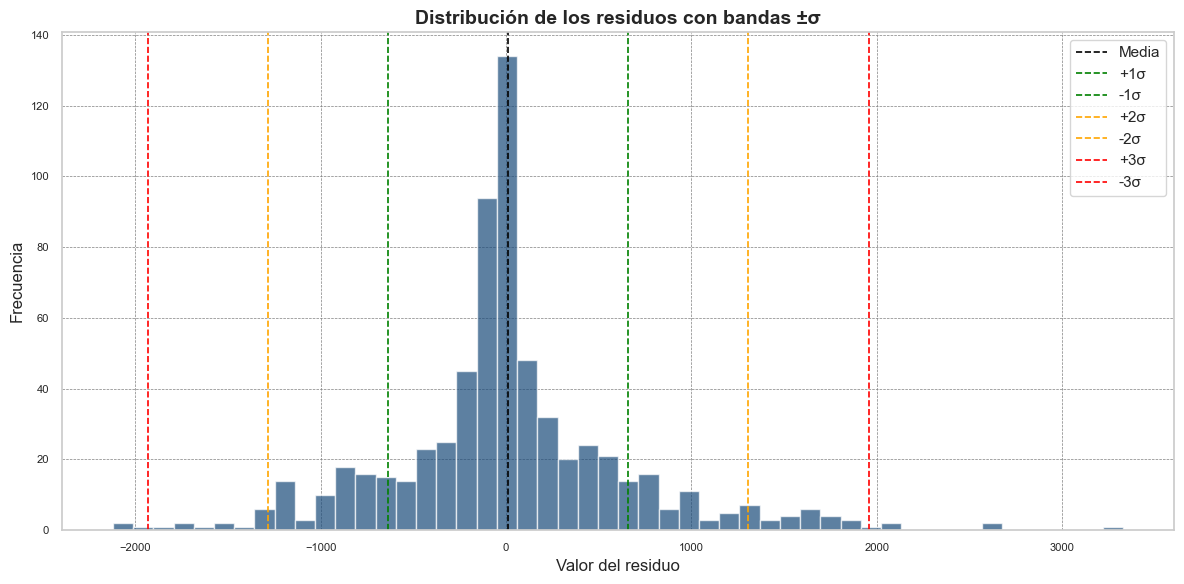

In [37]:

# Visualización
plt.figure()
plt.hist(residuos, bins=50, alpha=0.7,edgecolor='white')
plt.axvline(media, color='black', linestyle='--', label='Media')

# Líneas para ±1σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(media + k * std, color=color, linestyle='--', label=f'+{k}σ')
    plt.axvline(media - k * std, color=color, linestyle='--', label=f'-{k}σ')

plt.title("Distribución de los residuos con bandas ±σ")
plt.xlabel("Valor del residuo")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Gráfico de Residuos de Modelo Propuesto**

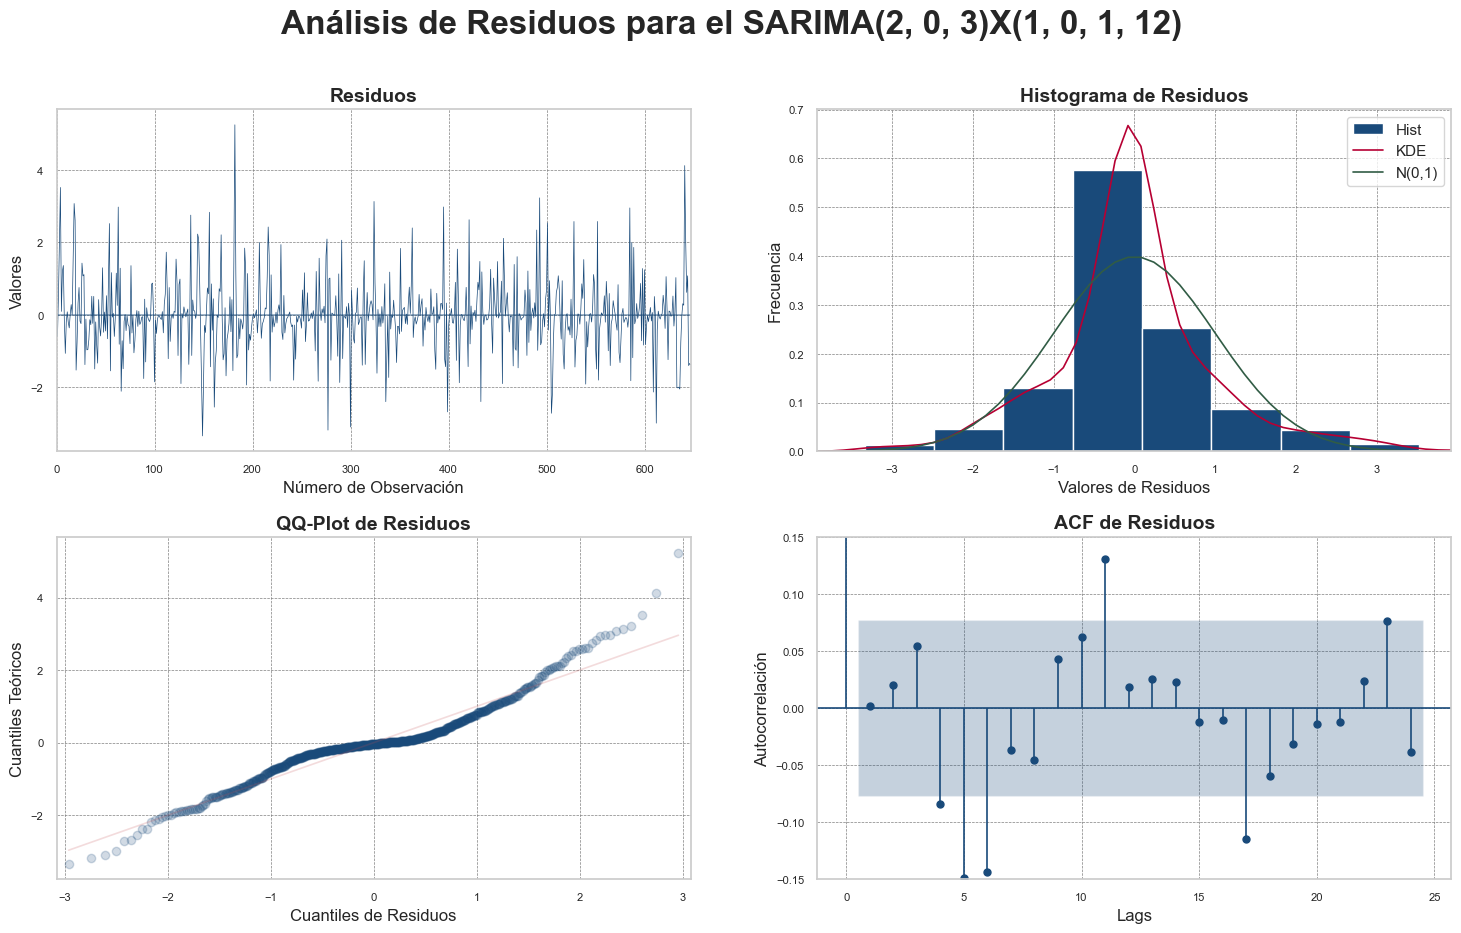

In [38]:
from matplotlib.collections import PathCollection

fig = modelo.plot_diagnostics(figsize=(18, 10), lags=24)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("ACF de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Lags")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el SARIMA(2, 0, 3)X(1, 0, 1, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/05-analisis-de-residuos.svg', bbox_inches='tight')
plt.show()


# **FORECAST**

In [39]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [41]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

660     893.202141
661     521.056552
662     139.729709
663      72.168527
664     122.688309
665     947.597243
666     642.400904
667     595.672407
668    1353.078912
669     995.482710
670     725.278278
671     715.590882
Name: predicted_mean, dtype: float64

In [42]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

,lower y,upper y
660,-352.580469,2138.984752
661,-742.428292,1784.541395
662,-1124.258147,1403.717565
663,-1191.833723,1336.170777
664,-1141.314353,1386.690971
665,-316.405431,2211.599916
666,-621.601771,1906.403578
667,-668.330267,1859.675081
668,89.076238,2617.081586
669,-268.519964,2259.485384


In [43]:
# Generate forecast dates and plot forecast series
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

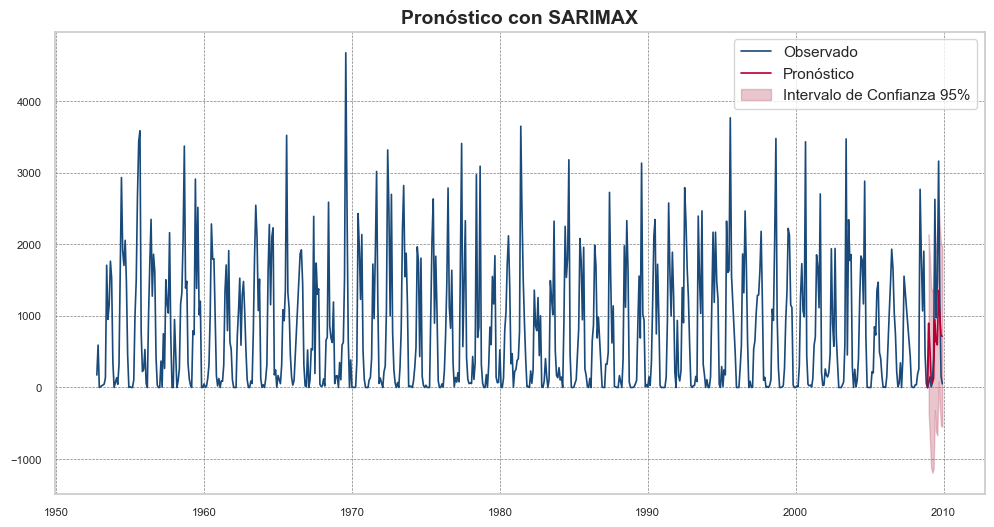

In [44]:
plt.figure()

# Serie original
plt.plot(pre_total, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast, label='Pronóstico', color=sns.color_palette()[1])

# Intervalos
plt.fill_between(forecast_index,
                    int_conf.iloc[:, 0], int_conf.iloc[:, 1], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = pre.index[-1]
last_obs_value = pre.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast.iloc[0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)


plt.legend()
plt.title('Pronóstico con SARIMAX') 
plt.savefig('imagenes/06-pronostico-sarimax.svg', bbox_inches='tight')
plt.show()

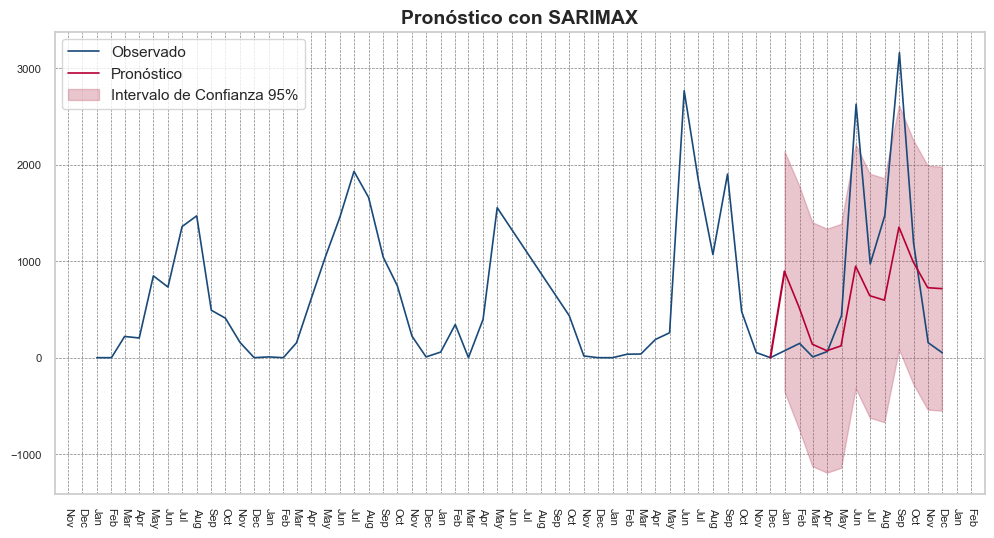

In [45]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())           # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))    # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre_total[pre_total.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, forecast, label='Pronóstico', color=sns.color_palette()[1])

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = pre.index[-1]
last_obs_value = pre.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast.iloc[0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)

# Intervalos
plt.fill_between(forecast_index,
                    int_conf.iloc[:, 0], int_conf.iloc[:, 1], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico con SARIMAX')
# plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/07-pronostico-sarimax-zoom.svg', bbox_inches='tight')
plt.show()

# **PRONÓSTICO ÓPTIMO**

In [46]:
pre_total.to_csv('04-01-Serie-Original.csv', index=False) # Guardar la serie original
residuos.to_csv('04-02-Serie-Residuos.csv', index=False) # Guardar la serie de residuos

In [47]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -5105.844
Date:                              Thu, 24 Apr 2025   AIC                          10217.689
Time:                                      18:01:24   BIC                          10231.111
Sample:                                           0   HQIC                         10222.896
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1692      0.031      5.453      0.000       0.108       0.230
ma.S.L12      -0.6868      0.024    -28.471      0.000      -0.734      -0.640
sigma2       4.04e+05   1.51e+04     26.829      0.000    3.74e+05    4.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               232.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.54
Prob(H) (two-sided):                  0.33   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


$$
\text{ARIMA}(1,0,0) \times (0,0,1)_{12} \text{ para $W_t$}
$$

$$
\text{ARIMA}(1,0,0) \times (0,1,1)_{12} \text{ para $X_t$}
$$

con los coeficientes:

- $\phi_1 = 0.1691785261672151$
- $\Theta_1 = 0.6868323986912898$

$$
(1
- \phi_1B)W_t=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

Donde $Wt = \nabla_{12}^1 X_t = X_t - X_{t-12}$ y $\varpsilon_t \sim \mathcal{N}(0, 1)$

## Desarrollo del modelo SARIMA

Partimos del modelo con diferenciación estacional:

$$
(1 - \phi_1B)W_t = (1 - \Theta_1 B^{12})\varpsilon_{t}
$$

Donde \( W_t = X_t - X_{t-12} \). Sustituyendo:

$$
(1 - \phi_1B)(X_t - X_{t-12}) = (1 - \Theta_1 B^{12})\varpsilon_{t}
$$

Aplicamos la multiplicación del operador \( (1 - \phi_1 B) \):

$$
(X_{t} - \phi_1BX_{t}) - (X_{t-12} - \phi_1BX_{t-12}) = (1 - \Theta_1 B^{12})\varpsilon_{t}
$$

Que equivale a:

$$
(X_{t} - \phi_1X_{t-1}) - (X_{t-12} - \phi_1X_{t-13}) = (1 - \Theta_1 B^{12})\varpsilon_{t}
$$

Simplificando:

$$
X_{t} - \phi_1X_{t-1} - X_{t-12} + \phi_1X_{t-13} = (1 - \Theta_1 B^{12})\varpsilon_{t}
$$

Aplicando el operador al ruido blanco:

$$
X_{t} - \phi_1X_{t-1} - X_{t-12} + \phi_1X_{t-13} = \varpsilon_{t} - \Theta_1\varpsilon_{t-12}
$$

Finalmente, despejamos \( X_t \):

$$
X_{t} = - \phi_1X_{t-1} + X_{t-12} - \phi_1X_{t-13} + \varpsilon_{t} - \Theta_1\varpsilon_{t-12}
$$



$$
(1
- \phi_1B)W_t=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$


$$
(1
- \phi_1B)(X_t - X_{t-12})=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

$$
(X_{t} - \phi_1BX_{t}) - (X_{t-12} - \phi_1BX_{t-12})=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

$$
(X_{t} - \phi_1X_{t-1}) - (X_{t-12} - \phi_1X_{t-13})=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

$$
X_{t} - \phi_1X_{t-1} - X_{t-12} + \phi_1X_{t-13}=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

$$
X_{t} - \phi_1X_{t-1} - X_{t-12} + \phi_1X_{t-13}=
\varpsilon_{t} - \Theta_1\varpsilon_{t-12}
$$

$$
X_{t} =
- \phi_1X_{t-1} + X_{t-12} - \phi_1X_{t-13} +
\varpsilon_{t} - \Theta_1\varpsilon_{t-12}
$$

$$
X_t(h) =
- \phi_1 \, \underset{t}{\mathbb{E}}[X_{t+h-1}]
+ \underset{t}{\mathbb{E}}[X_{t+h-12}]
- \phi_1 \, \underset{t}{\mathbb{E}}[X_{t+h-13}]
+ \underset{t}{\mathbb{E}}[\varpsilon_{t+h}] 
- \Theta  \, \underset{t}{\mathbb{E}}[\varpsilon_{t+h-12}] 
$$

In [ ]:
# Intervalo de Predicción
# Pronosntico optimo[i] +- 1.96*(suma de psis)^{1/2}*std(residuos)

# Calcula de las espis
psi0 = -1

# psi[i] = teta[i] + Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d] si i=1,2,...,q
# psi[i] = Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d]           si i>q


Se calcula en 04-Calculo-del-Pronostico-Optimo

In [48]:
# pronostico optimo 

# 893.2021421
# 218.8353082
# 14.55589463
# 46.06671573
# 102.6854446
# 909.4688428
# 328.2252003
# 431.4633135
# 1179.309604
# 567.0569539
# 460.930121
# 514.9098934

# Guardarlos en una serie

pronostico_optimo = pd.Series([893.2021421, 218.8353082, 14.55589463, 46.06671573, 102.6854446, 909.4688428, 328.2252003, 431.4633135, 1179.309604, 567.0569539, 460.930121, 514.9098934],
                            index=pd.date_range(start='2009-01-01', periods=12, freq='ME'))

In [ ]:
# Intervalo de Predicción
# Pronosntico optimo[i] +- 1.96*(suma de psis)^{1/2}*std(residuos)

# Calcula de las espis
psi0 = -1

# psi[i] = teta[i] + Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d] si i=1,2,...,q
# psi[i] = Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d]           si i>q

phi1 = modelo.params[0]
teta12 = modelo.params[1]

psi1 = phi1*psi0
psi2 = phi1*psi1
psi3 = phi1*psi2 
psi4 = phi1*psi3
psi5 = phi1*psi4
psi6 = phi1*psi5
psi7 = phi1*psi6
psi8 = phi1*psi7
psi9 = phi1*psi8
psi10 = phi1*psi9
psi11 = phi1*psi10
psi12 = phi1*psi11 + teta12

C:\Users\herie\AppData\Local\Temp\ipykernel_16108\294999966.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi1 = modelo.params[0]
C:\Users\herie\AppData\Local\Temp\ipykernel_16108\294999966.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  teta12 = modelo.params[1]


In [50]:
psis = [psi0, psi1, psi2, psi3, psi4, psi5, psi6, psi7, psi8, psi9, psi10, psi11, psi12]

In [51]:
sigmax = np.std(residuos)

In [54]:
# primer intervalo
u0 = pronostico_optimo[0] + 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l0 = pronostico_optimo[0] - 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# segundo intervalo
u1 = pronostico_optimo[1] + 1.96*(psis[0]**2+psis[1]**2)**(1/2)*sigmax # 218.8353082 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l1 = pronostico_optimo[1] - 1.96*(psis[0]**2+psis[1]**2)**(1/2)*sigmax # 218.8353082 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# tercer intervalo
u2 = pronostico_optimo[2] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2)**(1/2)*sigmax # 14.55589463 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l2 = pronostico_optimo[2] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2)**(1/2)*sigmax # 14.55589463 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# cuarto intervalo
u3 = pronostico_optimo[3] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2)**(1/2)*sigmax # 46.06671573 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l3 = pronostico_optimo[3] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2)**(1/2)*sigmax # 46.06671573 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# quinto intervalo
u4 = pronostico_optimo[4] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2)**(1/2)*sigmax # 102.6854446 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l4 = pronostico_optimo[4] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2)**(1/2)*sigmax # 102.6854446 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# sexto intervalo
u5 = pronostico_optimo[5] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2)**(1/2)*sigmax # 909.4688428 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l5 = pronostico_optimo[5] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2)**(1/2)*sigmax # 909.4688428 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# septimo intervalo
u6 = pronostico_optimo[6] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2)**(1/2)*sigmax # 328.2252003 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l6 = pronostico_optimo[6] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2)**(1/2)*sigmax # 328.2252003 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# octavo intervalo
u7 = pronostico_optimo[7] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2)**(1/2)*sigmax # 431.4633135 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l7 = pronostico_optimo[7] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2)**(1/2)*sigmax # 431.4633135 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# noveno intervalo
u8 = pronostico_optimo[8] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2)**(1/2)*sigmax # 1179.309604 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l8 = pronostico_optimo[8] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2)**(1/2)*sigmax # 1179.309604 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo intervalo
u9 = pronostico_optimo[9] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2)**(1/2)*sigmax # 567.0569539 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l9 = pronostico_optimo[9] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2)**(1/2)*sigmax # 567.0569539 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo primero intervalo
u10 = pronostico_optimo[10] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2)**(1/2)*sigmax # 460.930121 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l10 = pronostico_optimo[10] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2)**(1/2)*sigmax # 460.930121 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo segundo intervalo
u11 = pronostico_optimo[11] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2+psis[11]**2)**(1/2)*sigmax # 514.9098934 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l11 = pronostico_optimo[11] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2+psis[11]**2)**(1/2)*sigmax # 514.9098934 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

C:\Users\herie\AppData\Local\Temp\ipykernel_16108\1674462016.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u0 = pronostico_optimo[0] + 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
C:\Users\herie\AppData\Local\Temp\ipykernel_16108\1674462016.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l0 = pronostico_optimo[0] - 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 - 1.96*(sum(psis))**(1/2)*np.std(residuos)
C:\Users\herie\AppData\Local\Temp\ipykernel_16108\1674462016.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

In [55]:
# Guardar los resultados en un dataframe
pronostico_optimo_df = pd.DataFrame({
    'Pronóstico': pronostico_optimo,
    'Límite Inferior': [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11],
    'Límite Superior': [u0, u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11]
}, index=pronostico_optimo.index)

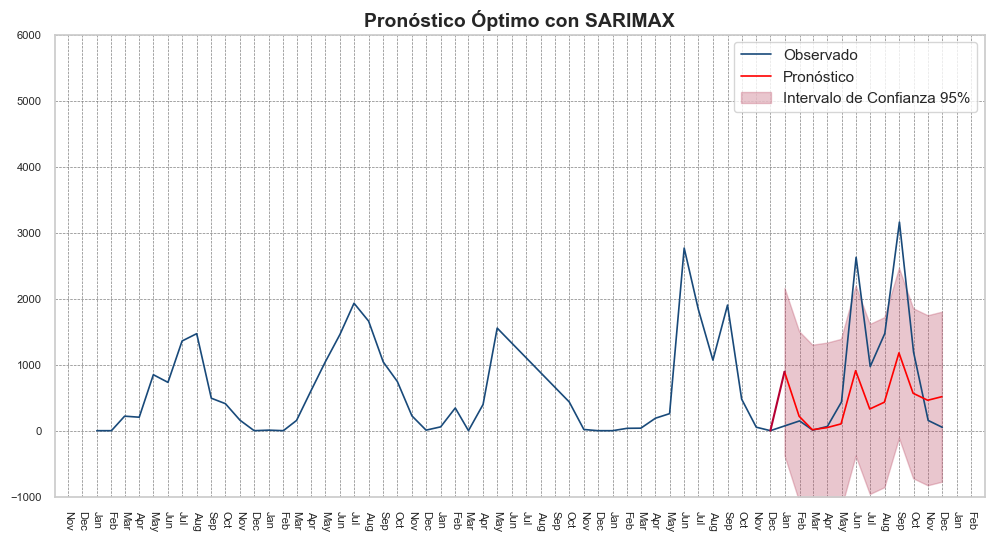

In [57]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre_total[pre_total.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_optimo, label='Pronóstico', color='red')

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = pre.index[-1]
last_obs_value = pre.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast.iloc[0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)

# Intervalos
plt.fill_between(forecast_index,
                    pronostico_optimo_df['Límite Inferior'], pronostico_optimo_df['Límite Superior'], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')


plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo con SARIMAX')
plt.ylim(-1000, 6000)
plt.grid(True)
plt.savefig('imagenes/08-pronostico-optimo-sarimax.svg', bbox_inches='tight')
plt.show()

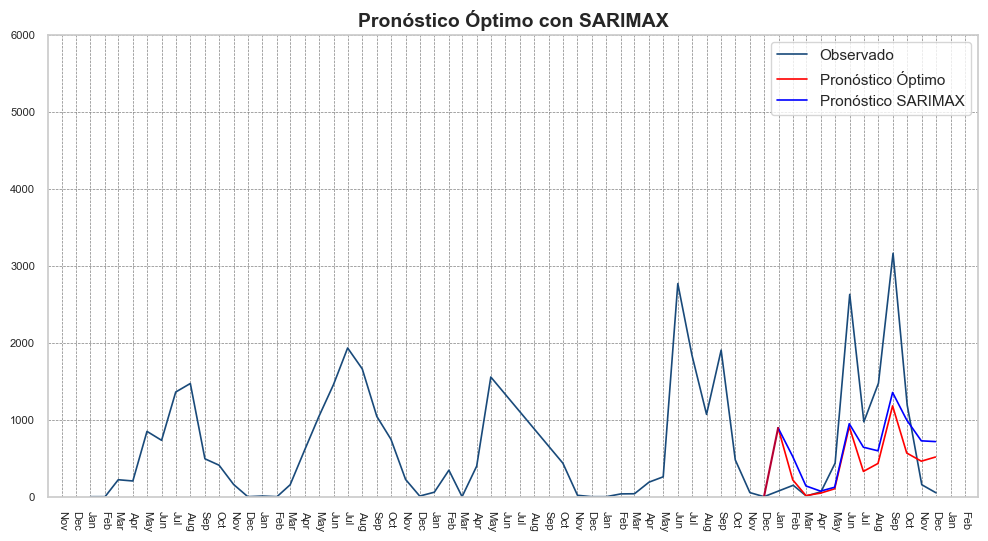

In [74]:
# Comparar el pronóstico óptimo con el pronóstico del modelo SARIMAX

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre_total[pre_total.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_optimo, label='Pronóstico Óptimo', color='red')
plt.plot(forecast_index, forecast, label='Pronóstico SARIMAX', color='blue')

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = pre.index[-1]
last_obs_value = pre.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast.iloc[0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/08-pronostico-optimo-sarimax.svg', bbox_inches='tight')
plt.show()